# Capstone Project 1: Bitcoin(BTC) and Litecoin(LTC) Prices.

In [1]:
%load_ext autoreload
%autoreload 2

#
# Imports.
#
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import Parallel, delayed
import operator
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

from crycompare import *

%matplotlib inline

In [2]:
#
# Obtain the price history (close, high, low, open) for bitcoin (BTC) using the crycompare library.
#
h = History()
btc_hist = h.histoDay('BTC', 'USD', allData=True)
if btc_hist['Data']:
    df_btc = pd.DataFrame(btc_hist['Data'])
    df_btc['time'] = pd.to_datetime(df_btc['time'], unit='s')
    df_btc.index = df_btc['time']
    del df_btc['time']

    
#
# Print the first 10 entries.
#
df_btc.head(10)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,20.00,0.9902
2010-07-18,0.08584,0.08585,0.05941,0.04951,75.01,5.0900
2010-07-19,0.08080,0.09307,0.07723,0.08584,574.00,49.6600
2010-07-20,0.07474,0.08181,0.07426,0.08080,262.00,20.5900
2010-07-21,0.07921,0.07921,0.06634,0.07474,575.00,42.2600
2010-07-22,0.05050,0.08181,0.05050,0.07921,2160.00,129.7800
2010-07-23,0.06262,0.06767,0.05050,0.05050,2402.50,141.0700
2010-07-24,0.05454,0.06161,0.05049,0.06262,496.32,26.7300
2010-07-25,0.05050,0.05941,0.05050,0.05454,1551.48,85.0600


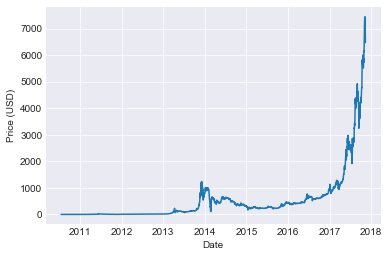

In [3]:
#
# Plot the closing price of bitcoin over time.
#
sns.set_style("darkgrid")
plt.plot(df_btc.close)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [4]:
#
# Obtain the price history (close, high, low, open) for litecoin (LTC) using the crycompare library.
#
ltc_hist = h.histoDay('LTC', 'USD', allData=True)
if ltc_hist['Data']:
    df_ltc = pd.DataFrame(ltc_hist['Data'])
    df_ltc['time'] = pd.to_datetime(df_ltc['time'], unit='s')
    df_ltc.index = df_ltc['time']
    del df_ltc['time']
 
    
#
# Print the first 10 entries.
#
df_ltc.head(10)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2013-10-24,3.0,3.0,3.0,3.0,2.71,8.12
2013-10-25,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-26,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-27,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-28,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-29,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-30,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-31,3.0,3.0,3.0,3.0,0.00,0.00
2013-11-01,3.0,3.0,3.0,3.0,0.00,0.00


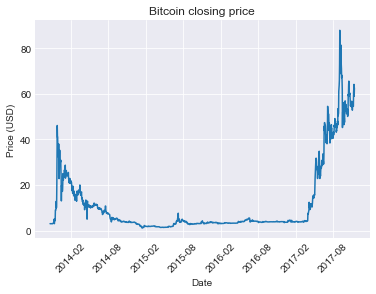

In [5]:
#
# Plot the closing price of litecoin over time.
#
sns.set_style("darkgrid")
plt.plot(df_ltc.close)
plt.xticks(rotation=45)
plt.title("Bitcoin closing price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [6]:
#
# Merge bitcoin and litecoin into a single dataframe.
#
df_coins = pd.concat([df_btc, df_ltc], axis=1)
df_coins.columns = ['btc_close','btc_high','btc_low','btc_open','btc_volfrom','btc_volto','ltc_close','ltc_high','ltc_low','ltc_open','ltc_volfrom','ltc_volto']

#
# Print the first 10 entries.
#
df_coins.head(10)

,btc_close,btc_high,btc_low,btc_open,btc_volfrom,btc_volto,ltc_close,ltc_high,ltc_low,ltc_open,ltc_volfrom,ltc_volto
time,,,,,,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,20.00,0.9902,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-18,0.08584,0.08585,0.05941,0.04951,75.01,5.0900,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.08080,0.09307,0.07723,0.08584,574.00,49.6600,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.07474,0.08181,0.07426,0.08080,262.00,20.5900,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.07921,0.07921,0.06634,0.07474,575.00,42.2600,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-22,0.05050,0.08181,0.05050,0.07921,2160.00,129.7800,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-23,0.06262,0.06767,0.05050,0.05050,2402.50,141.0700,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-24,0.05454,0.06161,0.05049,0.06262,496.32,26.7300,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-25,0.05050,0.05941,0.05050,0.05454,1551.48,85.0600,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#
# Print the dataframe info.
#
df_coins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2675 entries, 2010-07-17 to 2017-11-11
Freq: D
Data columns (total 12 columns):
btc_close      2675 non-null float64
btc_high       2675 non-null float64
btc_low        2675 non-null float64
btc_open       2675 non-null float64
btc_volfrom    2675 non-null float64
btc_volto      2675 non-null float64
ltc_close      1480 non-null float64
ltc_high       1480 non-null float64
ltc_low        1480 non-null float64
ltc_open       1480 non-null float64
ltc_volfrom    1480 non-null float64
ltc_volto      1480 non-null float64
dtypes: float64(12)
memory usage: 271.7 KB


In [8]:
#
# Remove entries where the litecoin close is NaN.
#
df_coins = df_coins[np.isfinite(df_coins.ltc_close)]

#
# Print the dataframe info.
#
df_coins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2013-10-24 to 2017-11-11
Freq: D
Data columns (total 12 columns):
btc_close      1480 non-null float64
btc_high       1480 non-null float64
btc_low        1480 non-null float64
btc_open       1480 non-null float64
btc_volfrom    1480 non-null float64
btc_volto      1480 non-null float64
ltc_close      1480 non-null float64
ltc_high       1480 non-null float64
ltc_low        1480 non-null float64
ltc_open       1480 non-null float64
ltc_volfrom    1480 non-null float64
ltc_volto      1480 non-null float64
dtypes: float64(12)
memory usage: 150.3 KB


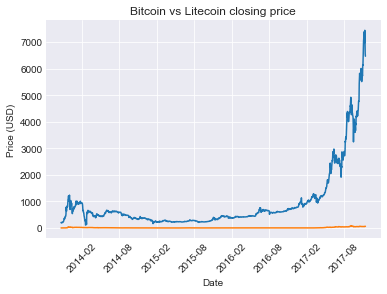

In [9]:
#
# Plot the two coins on the same plot.
#
sns.set_style("darkgrid")
plt.plot(df_coins.btc_close)
plt.plot(df_coins.ltc_close)
plt.xticks(rotation=45)
plt.title("Bitcoin vs Litecoin closing price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

### This plot isnt very helpful so lets normalize it.

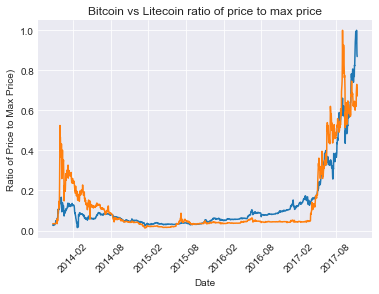

In [10]:
#
# Plot the two coins on the same plot but normalized.
#
sns.set_style("darkgrid")
plt.plot(df_coins.btc_close / df_coins.btc_close.max())
plt.plot(df_coins.ltc_close / df_coins.ltc_close.max())
plt.xticks(rotation=45)
plt.title("Bitcoin vs Litecoin ratio of price to max price")
plt.xlabel("Date")
plt.ylabel("Ratio of Price to Max Price)")
plt.show()

In [11]:
#
# Query google for the keyword trend.
#
bitcoin = TrendReq()
litecoin = TrendReq()
bitcoin.build_payload(["bitcoin"])
litecoin.build_payload(["litecoin"])

#
# Obtain the intrest over time.  Resample by day and forward fill.
#
df_kwrd_bitcoin = bitcoin.interest_over_time().resample('D').ffill()
df_kwrd_litecoin = litecoin.interest_over_time().resample('D').ffill()
del df_kwrd_bitcoin['isPartial']
del df_kwrd_litecoin['isPartial']

#
# Print the first 10 entries for bitcoin.
#
df_kwrd_bitcoin.head(10)

,bitcoin
date,
2012-11-11,2
2012-11-12,2
2012-11-13,2
2012-11-14,2
2012-11-15,2
2012-11-16,2
2012-11-17,2
2012-11-18,2
2012-11-19,2


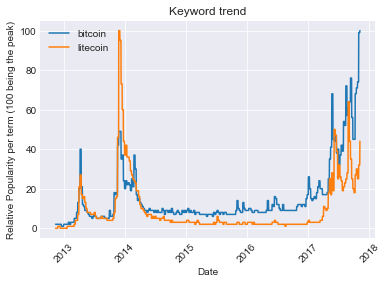

In [12]:
#
# Plot the two keywords on the same plot.
#
sns.set_style("darkgrid")
plt.plot(df_kwrd_bitcoin.bitcoin)
plt.plot(df_kwrd_litecoin.litecoin)
plt.legend(["bitcoin", "litecoin"])
plt.xticks(rotation=45)
plt.title("Keyword trend")
plt.xlabel("Date")
plt.ylabel("Relative Popularity per term (100 being the peak)")
plt.show()

In [13]:
#
# Concatinate the keyword search data with the df_coins dataframe.
#
df_coins['btc_kwrd'] = df_kwrd_bitcoin.bitcoin
df_coins['ltc_kwrd'] = df_kwrd_litecoin.litecoin

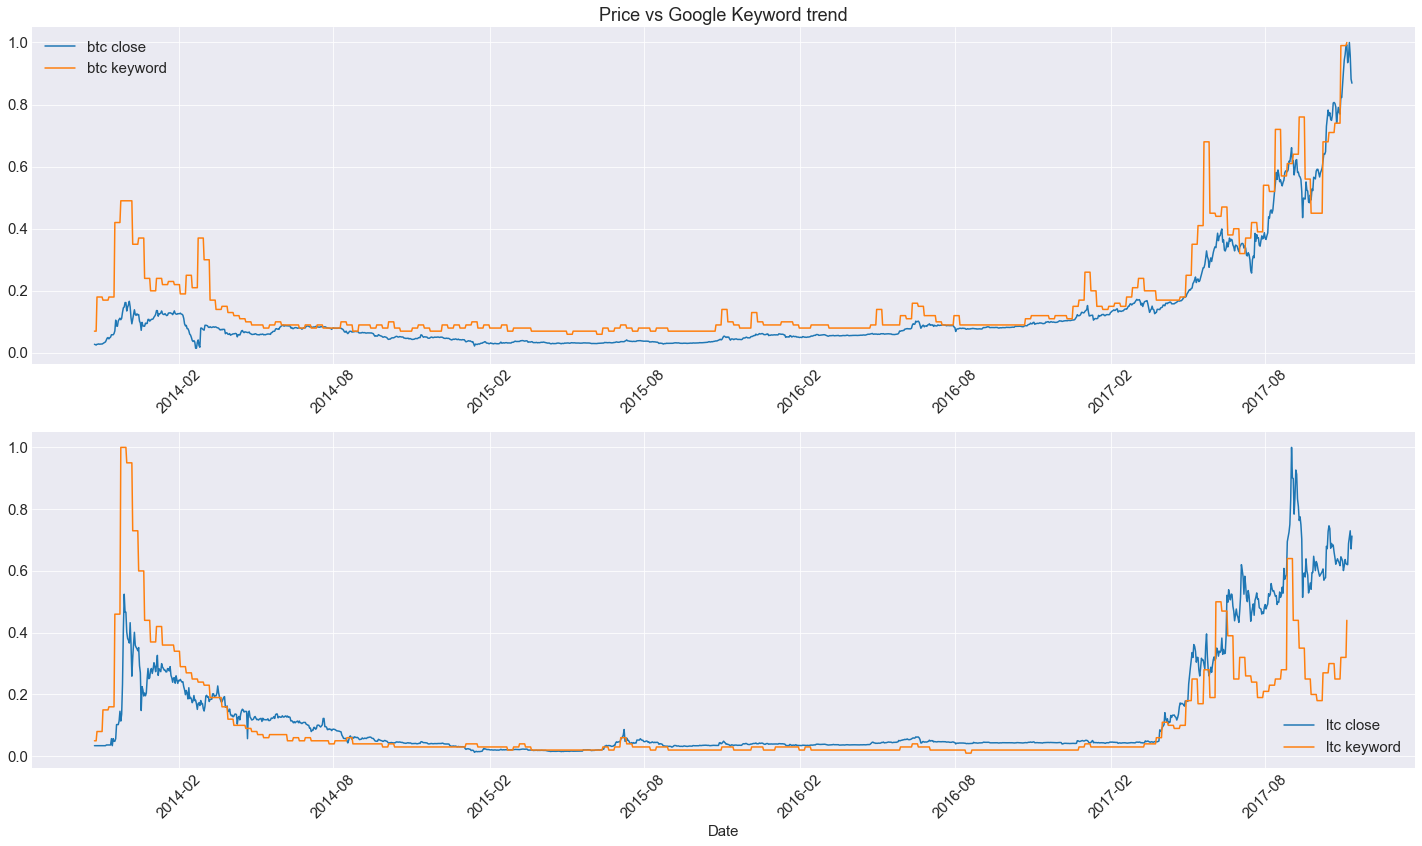

In [18]:
#
# Plot price vs keyword on the same plot.
#
plt.rcParams.update({'font.size': 15})
sns.set_style("darkgrid")
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(211)
plt.title("Price vs Google Keyword trend")
ax.plot(df_coins.btc_close / df_coins.btc_close.max())
ax.plot(df_coins.btc_kwrd / df_coins.btc_kwrd.max())
ax.legend(["btc close", "btc keyword"])
plt.xticks(rotation=45)
ax = fig.add_subplot(212)
ax.plot(df_coins.ltc_close / df_coins.ltc_close.max())
ax.plot(df_coins.ltc_kwrd / df_coins.ltc_kwrd.max())
ax.legend(["ltc close", "ltc keyword"])
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.tight_layout()
plt.show()